<a href="https://colab.research.google.com/github/JanaDeCoster/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Kaggle_eye_blinking_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd;
import warnings;
warnings.filterwarnings('ignore');
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.linear_model import LinearRegression;
from sklearn import metrics;
from sklearn import linear_model;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import cross_val_score;
from sklearn.model_selection import GridSearchCV;




#Eye blinking prediction

The goal of this project is to find a model that wil be trained on a train dataset and that will perform well on the test dataset. The results of fitting this model on the test dataset will be scored in Kaggle to see how well the prediction of the model are.

The following data will be sed as test- and train datasets.

In [0]:
trainset_unprocessed = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset_unprocessed = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

In [81]:
print(trainset_unprocessed.head())
print(testset_unprocessed.head())

       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]


Before we can standerdize the data we first have to pop the label column of the trainset and the index column of the testset since these do not need to be standardized.

In [0]:
label = trainset_unprocessed['label']
index = testset_unprocessed['index']

In [83]:
trainset_unprocessed.pop('label')
testset_unprocessed.pop('index')

0            0
1            1
2            2
3            3
4            4
         ...  
12887    12887
12888    12888
12889    12889
12890    12890
12891    12891
Name: index, Length: 12892, dtype: int64

## Pre-processing

The first step in this process would be to pre-process or standardize. This has to be done since feature values can have different scales (so different minimum and different maximum values). 

So we will do this as well for our datasets (both the test- and train dataset).


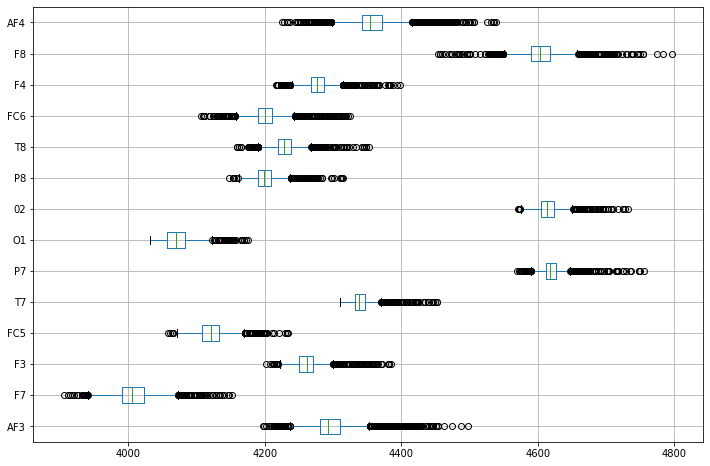

In [84]:
plt.figure(figsize=(12,8))
trainset_unprocessed.boxplot(vert=False)
plt.show()

This plot shows us that data normalization will most defenitly be necessary.

This normalization can either be done by standardization or by scaling the data.

We will just plot both of these aproaches to take a look how this actually works.


Firts we will try **standardization**. This method scales the features such that they will have the properties of a normal distribution ($\mu = 0$ and $\sigma = 1$). 

\begin{equation} x_{norm} = \frac{x - \mu}{\sigma}\end{equation} 


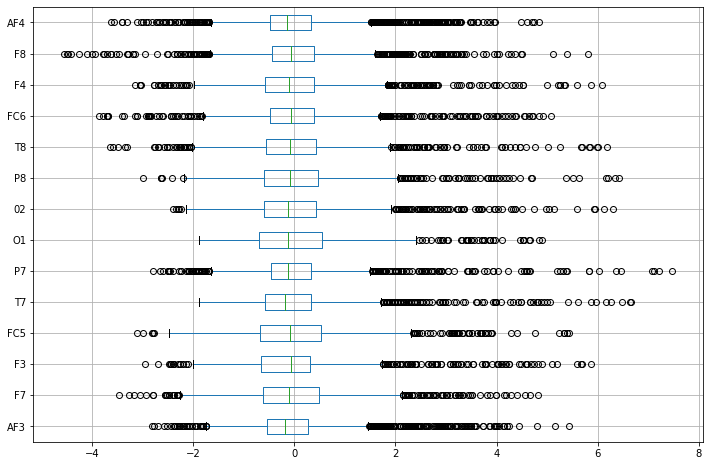

In [85]:
trainset_unprocessed_columns = trainset_unprocessed.columns.values
scaler = StandardScaler()
scaler.fit(trainset_unprocessed)
trainset_stand = pd.DataFrame(scaler.transform(trainset_unprocessed),columns=trainset_unprocessed_columns)
plt.figure(figsize=(12,8))
trainset_stand.boxplot(vert=False)
plt.show()

The other method we can use is the **scaling method**. This uses the following equation:
 \begin{equation} x_{norm} = \frac{x - x_{min}}{x_{max}-x_{min}} \end{equation}
In this equation $x_{min}$ and $x_{max}$ represent the minimum and maximum values respectively.

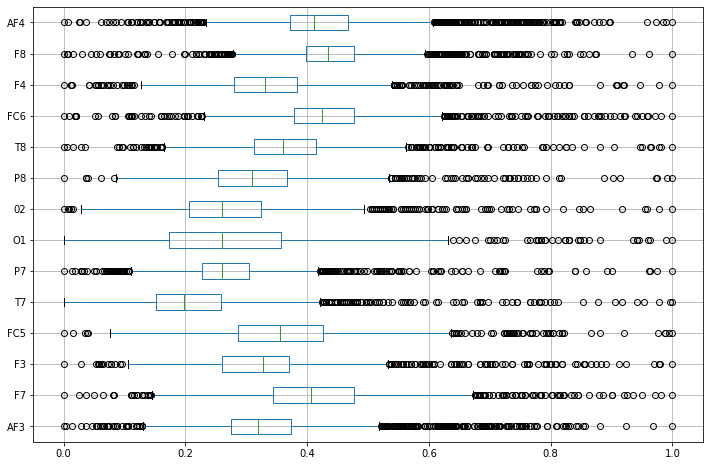

In [86]:
trainset_unprocessed_columns = trainset_unprocessed.columns.values
scaler = MinMaxScaler()
scaler.fit(trainset_unprocessed)
trainset_scaling = pd.DataFrame(scaler.transform(trainset_unprocessed),columns=trainset_unprocessed_columns)
plt.figure(figsize=(12,8))
trainset_scaling.boxplot(vert=False)
plt.show()

I will choose the first method for this project since the standardization shows more centered results.

So the train dataset that will be used is now **trainset_stand**.

Now we will also do the same for the test dataset.

In [0]:
testset_unprocessed_columns = testset_unprocessed.columns.values
scaler = StandardScaler()
scaler.fit(testset_unprocessed)
testset_stand = pd.DataFrame(scaler.transform(testset_unprocessed),columns=testset_unprocessed_columns)

In [88]:
print(trainset_stand.head())
print(testset_stand.head())

        AF3        F7        F3  ...        F4        F8       AF4
0 -0.018351 -0.396476  0.677912  ...  0.026714 -0.156365  0.252992
1  0.052070 -0.791842 -0.136210  ...  0.235973  0.060820 -0.037576
2  0.574178  0.222036  0.061066  ...  0.392280  0.091976  0.322059
3  2.972354  3.177226  5.588146  ...  5.588622  3.349453  2.812530
4  1.293521 -1.135609  0.135164  ...  1.776139  1.782573  1.401236

[5 rows x 14 columns]
        AF3        F7        F3  ...        F4        F8       AF4
0 -0.010808  0.637498 -0.227519  ... -0.241279 -0.014097 -0.013075
1 -0.012718 -0.322712 -0.357935  ... -0.427551 -0.018036 -0.013801
2 -0.009661  0.200150  0.120467  ...  0.026217 -0.015279 -0.011863
3 -0.016917 -0.109240 -0.009948  ... -0.171626 -0.006219 -0.012833
4 -0.002979 -0.856185 -0.075262  ...  0.061157 -0.018819 -0.008310

[5 rows x 14 columns]


Now we can add the label and index again to these datasets.


In [89]:
trainset_stand['label'] = label
testset_stand['index'] = index

print(trainset_stand.head())
print(testset_stand.head())

        AF3        F7        F3       FC5  ...        F4        F8       AF4  label
0 -0.018351 -0.396476  0.677912 -0.277047  ...  0.026714 -0.156365  0.252992      1
1  0.052070 -0.791842 -0.136210  0.346482  ...  0.235973  0.060820 -0.037576      0
2  0.574178  0.222036  0.061066 -0.002733  ...  0.392280  0.091976  0.322059      0
3  2.972354  3.177226  5.588146  5.335202  ...  5.588622  3.349453  2.812530      0
4  1.293521 -1.135609  0.135164 -0.975478  ...  1.776139  1.782573  1.401236      1

[5 rows x 15 columns]
        AF3        F7        F3       FC5  ...        F4        F8       AF4  index
0 -0.010808  0.637498 -0.227519 -0.008487  ... -0.241279 -0.014097 -0.013075      0
1 -0.012718 -0.322712 -0.357935 -0.012318  ... -0.427551 -0.018036 -0.013801      1
2 -0.009661  0.200150  0.120467 -0.009855  ...  0.026217 -0.015279 -0.011863      2
3 -0.016917 -0.109240 -0.009948 -0.009126  ... -0.171626 -0.006219 -0.012833      3
4 -0.002979 -0.856185 -0.075262 -0.012500  ...  0.061

## Models

We can now first visualise some of the data and then we can decide which model we will make.

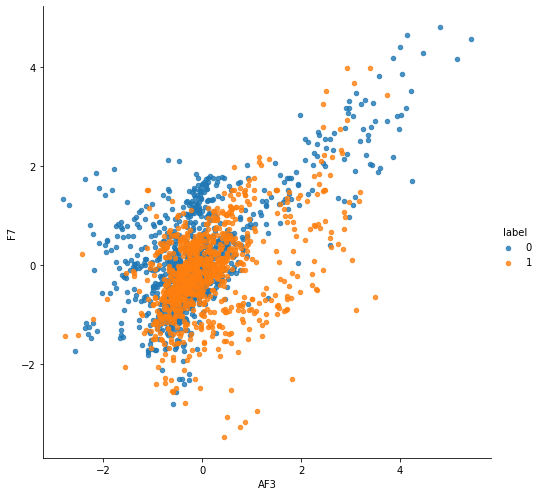

In [90]:
sns.lmplot(x="AF3", y="F7", hue = 'label', data=trainset_stand, fit_reg=False, height=7, scatter_kws={"s": 20})

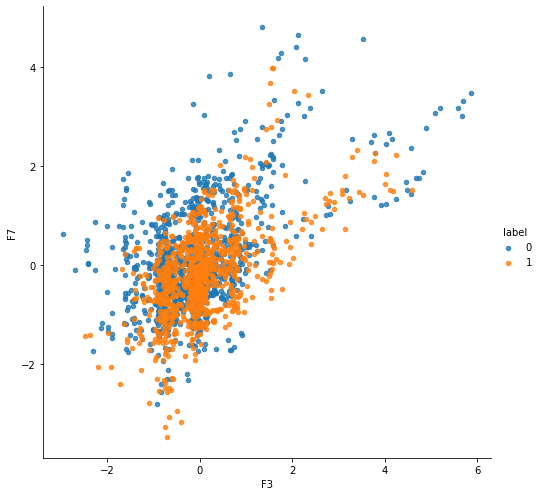

In [91]:
sns.lmplot(x="F3", y="F7", hue = 'label', data=trainset_stand, fit_reg=False, height=7, scatter_kws={"s": 20})

In [0]:
sns.lmplot(x="F3", y="AF3", hue = 'label', data=trainset_stand, fit_reg=False, height=7, scatter_kws={"s": 20})

In [0]:
sns.lmplot(x="AF3", y="FC5", hue = 'label', data=trainset_stand, fit_reg=False, height=7, scatter_kws={"s": 20})

We can see large clusters that appear and we can also see that there appears to be a linear correlation. Since the large clusters seem to appear more together the model probably would not be a linear model.
We will first try to see if a linear model would seperate the data well and then we will look for a non-linear regression model and see how well this one performs.



### Linear model

First lets see if a linear model could seperate the data.

In [0]:
X = trainset_stand
y = trainset_stand.pop('label')

X_test = testset_stand
y_test = testset_stand.pop('index')

model = linear_model.SGDRegressor(eta0 = 0.001) 
model.fit(X,y)
predictions = model.predict(X_test)
predictions

We can now check how correct these predictions are.

In [0]:
sample_submission = pd.DataFrame(columns = ['index', 'label'])
sample_submission['index'] = y_test
sample_submission['label'] = predictions
sample_submission.head()

In [0]:
filename = "DeCosterJana_prediction_results.csv"

sample_submission.to_csv(filename,index=False)

We get a score of **0.60079**. This probably suggests that the data is not ideally seperated using a linear model.


### Linear regression model


In [0]:
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
predictions = model.predict(X_test)
predictions

In [0]:
sample_submission = pd.DataFrame(columns = ['index', 'label'])
sample_submission['index'] = y_test
sample_submission['label'] = predictions
sample_submission.head()

In [0]:
filename = "DeCosterJana_prediction_results3.csv"

sample_submission.to_csv(filename,index=False)

This gives a score of 0.56006. So a linear regression model is not the answer.

### Logistic regression model

We will try to fit a logistic model.

First we will try to find the best value for the hyperparameter C.

In [0]:
model = LogisticRegression() 
parameters = {'C' : [0.001,0.01,0.1,1,10,100, 1000]}
grid_search = GridSearchCV(model, param_grid = parameters)
grid_search.fit(X, y)

for mean_score, std, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['std_test_score'], grid_search.cv_results_['params']):
  print('{:.3f} (+/-{:.3f}) for {}'.format(mean_score, std * 2, params))

print(grid_search.best_estimator_)

In [0]:
model = LogisticRegression(C=10) 
model.fit(X,y)
predictions = model.predict_proba(X_test)[:,1]
predictions

In [0]:
sample_submission = pd.DataFrame(columns = ['index', 'label'])
sample_submission['index'] = y_test
sample_submission['label'] = predictions
sample_submission.head()

In [0]:
filename = "DeCosterJana_prediction_results2.csv"

sample_submission.to_csv(filename,index=False)

This gave a score of **0.56433** which is even worse than a linear model.

This  means we have to look at some other options.

# 11/05/2020

In [0]:
model = LogisticRegression(C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print(print(np.mean(scores)))